In [1]:
import sys
import numpy as np
sys.path.insert(1, '../../reinforcement_learning/code')
from env.bandit_env import BanditEnv
from agents.bandit_agent import Agent
from matplotlib import pyplot as plt

### Exercise 2.5

In [2]:

def run(action_space, state_space, seed, epsilon):
    agent = Agent(action_space=action_space, state_space=state_space, seed = seed, epsilon=epsilon, e_greedy=True)
    env = BanditEnv(action_space)
    optimal_actions = np.zeros(max_steps)
    rewards = np.zeros(max_steps)
    for episode in range(num_episodes):
        env.reset()
        for t in range(max_steps):
            action = agent.act()
            _, reward, done, _ = env.step(action, )
            agent.step(reward=reward, action=action, sample_average=True)
            rewards[t]+=reward
            if action == env.best_action:
                optimal_actions[t]+=1
    return rewards/num_episodes , optimal_actions/num_episodes

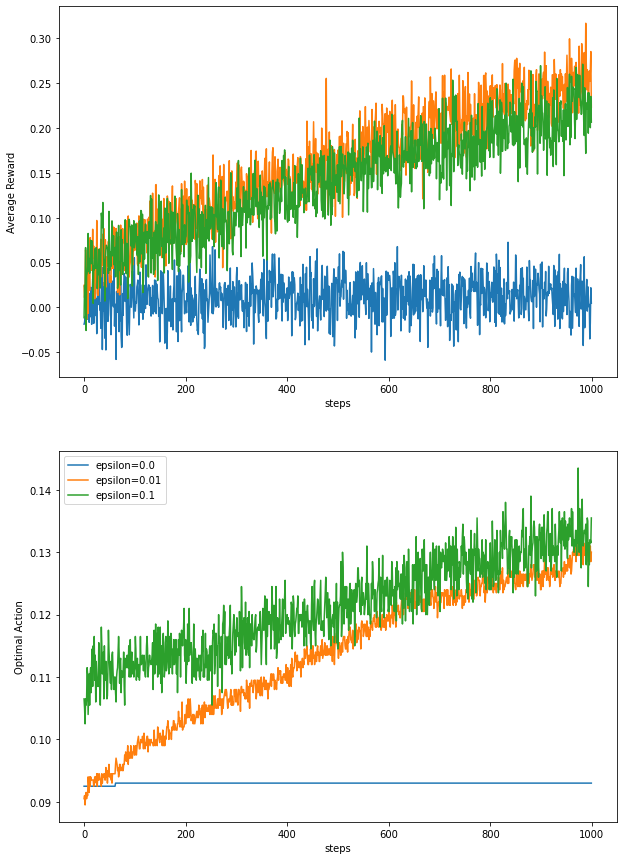

In [3]:
action_space = 10
state_space = 1
seed = 42
num_episodes = 2000
max_steps = 1000
plt.figure(figsize=(10,15))
plt.subplot()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
rewards = []
optimal_actions = []
for i, epsilon in enumerate([0., 0.01, 0.1]):
    rewards, optimal_actions = run(action_space=action_space, state_space=state_space, seed = seed, epsilon=epsilon)
    ax1.plot(rewards, label=f'epsilon={epsilon}')
    ax2.plot(optimal_actions, label=f'epsilon={epsilon}')
ax1.set_xlabel('steps')
ax1.set_ylabel('Average Reward')
ax2.set_xlabel('steps')
ax2.set_ylabel('Optimal Action')
plt.legend()
plt.show()